# Hand Witten Digit Classification - Deep Neural Network(CNN)

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

2022-12-20 01:36:27.825365: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 01:36:28.002097: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 01:36:28.002125: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 01:36:32.134478: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## After loading the MNIST data,Lets divide into train and test datasets 

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
import matplotlib.pyplot as plt

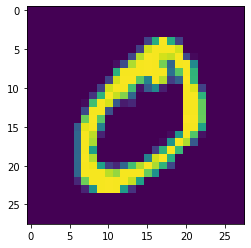

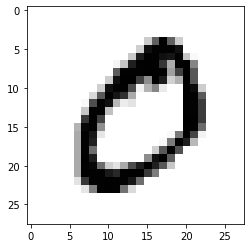

In [6]:
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_train[1],cmap = plt.cm.binary)

## Checking the values of each pixel Before normalization

In [7]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

## Images are in Gray level ('Channel ==>'0-255), not colored (RGB)
## Normalizing the data 
## Preprocessing step

In [8]:
# gray images all the values varies from 0 to 255

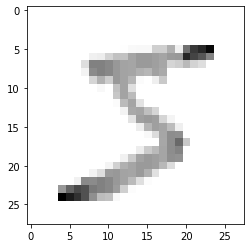

In [9]:
X_train = tf.keras.utils.normalize(X_train, axis =1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0],cmap = plt.cm.binary)

In [10]:
X_train[777]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# X_train contains data and y_train contain label
# X_train[0] showing as 5 as y_train[0]
y_train[0]

5

## Resizing image to make it suitable for apply Convolution Operation

In [12]:
import numpy as np

In [13]:
img_size = 28
X_train_r = np.array(X_train).reshape(-1,img_size,img_size,1)
# incresing one dimension for kernel operation
X_test_r = np.array(X_test).reshape(-1,img_size,img_size,1)
print("Training Samples dimesion :",X_train_r.shape)
print("testing Samples dimesion :",X_test_r.shape)

Training Samples dimesion : (60000, 28, 28, 1)
testing Samples dimesion : (10000, 28, 28, 1)


## Creating a Deep Neural Network
## Training on 60,000 sample of MNIST handwritten datasets

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,MaxPooling2D

In [15]:
## Creating a Neural Network
model = Sequential()

## First Convolution Layer
model.add(Conv2D(64,(3,3),input_shape = X_train_r.shape[1:]))## oly first conv layer mention input layer size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# 2nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer 1
model.add(Flatten())
# before using fully connected layer need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully connected Layer,output must be equal to the no of classes 10(0-9)
model.add(Dense(10))
model.add(Activation('softmax'))

2022-12-20 01:37:03.063065: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-20 01:37:03.113720: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-20 01:37:03.119213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (priyanka-Inspiron-15-3567): /proc/driver/nvidia/version does not exist
2022-12-20 01:37:03.525717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [17]:
print("Total Training Samples",len(X_train_r))

Total Training Samples 60000


In [18]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ['Accuracy'])

In [19]:
model.fit(X_train_r,y_train,epochs = 5, validation_split = 0.3)

2022-12-20 01:37:10.623699: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 131712000 exceeds 10% of free system memory.


Epoch 1/5
   4/1313 [..............................] - ETA: 1:04 - loss: 2.2920 - Accuracy: 0.1484 

2022-12-20 01:37:29.080577: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.
2022-12-20 01:37:29.134656: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.
2022-12-20 01:37:29.211109: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.
2022-12-20 01:37:29.211265: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19236096 exceeds 10% of free system memory.


1313/1313 [==============================] - 68s 44ms/step - loss: 0.3453 - Accuracy: 0.8916 - val_loss: 0.1405 - val_Accuracy: 0.9559
Epoch 2/5
1313/1313 [==============================] - 52s 40ms/step - loss: 0.1069 - Accuracy: 0.9676 - val_loss: 0.0879 - val_Accuracy: 0.9735
Epoch 3/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0784 - Accuracy: 0.9760 - val_loss: 0.0994 - val_Accuracy: 0.9683
Epoch 4/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0598 - Accuracy: 0.9811 - val_loss: 0.0675 - val_Accuracy: 0.9815
Epoch 5/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0494 - Accuracy: 0.9844 - val_loss: 0.0702 - val_Accuracy: 0.9787


In [20]:
## If validation accuracy is 30 and accuracy is 90 then =>overfitted =>solution -Dropout neurons etc

In [21]:
# Checking Accuracy 
test_loss,test_acc = model.evaluate(X_test_r,y_test)
print("Test loss on 10000 test samples",test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.0687 - Accuracy: 0.9784
Test loss on 10000 test samples 0.06870733946561813


In [22]:
prediction = model.predict([X_test_r])

313/313 [==============================] - 4s 11ms/step


In [23]:
print(prediction)

[[4.73838963e-06 1.99398084e-04 2.11175429e-05 ... 9.99734998e-01
  1.35385619e-07 2.76968458e-05]
 [4.06954292e-04 2.80760014e-05 9.99152720e-01 ... 1.16055253e-06
  1.15597184e-04 9.34057971e-06]
 [1.86498070e-08 9.99990404e-01 4.87627076e-08 ... 1.59636068e-06
  3.10774993e-07 2.62663048e-06]
 ...
 [1.01403209e-07 6.30731790e-07 3.17109851e-07 ... 3.95129200e-06
  1.47837727e-05 5.63714595e-04]
 [7.35590220e-05 6.51117116e-09 1.97446202e-08 ... 7.25244433e-08
  2.97043825e-05 3.03639951e-07]
 [2.15949956e-03 2.74382655e-05 7.56427122e-04 ... 1.05743382e-07
  1.48978594e-04 1.56871640e-04]]


In [24]:
#In order to understand,COnver the prediction from one hot encoding,we need to use numpy for that

In [25]:
print(np.argmax(prediction[0]))
## argmax return the maximim value index and find the value of it

7


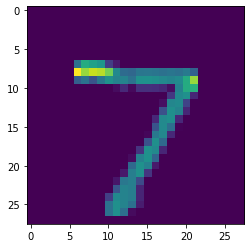

In [26]:
# Now check that is our answer is true or not
plt.imshow(X_test_r[0])

In [27]:
print(np.argmax(prediction[119]))

2


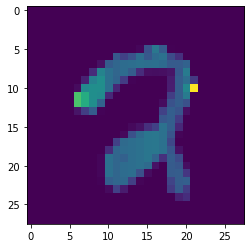

In [28]:
plt.imshow(X_test_r[119])